In [1]:
from datetime import datetime
d = datetime.now()
only_date, only_time = d.date(), d.time()
only_date

datetime.date(2021, 7, 23)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from numpy import mean
from numpy import var
from math import sqrt

### Data in use


In this notebook two csv files are needed:
1. categories_transformed.csv
2. all_rating_processed.csv

To perform calculation, categories that are going to be compared must be defined in an object **max_catg**  below

In [3]:
games = pd.read_csv('categories_transformed.csv', sep = '\t', encoding='utf-8')

In [4]:
games.head(1)

,Unnamed: 0,name,id,url,full_url,categories,Adventure,Exploration,Fantasy,Fighting,...,American Revolutionary War,Napoleonic,Childrens Game,Memory,American Civil War,Vietnam War,Math,Number,Trivia,nan
0,0,Gloomhaven,174430,/boardgame/174430/gloomhaven,https://boardgamegeek.com/boardgame/174430/glo...,"['Adventure', 'Exploration', 'Fantasy', 'Fight...",Yes,Yes,Yes,Yes,...,No,No,No,No,No,No,No,No,No,No


In [5]:
games.drop(['Unnamed: 0',],axis=1,inplace=True)

In [6]:
# dictionary of European contries was adjusted, use file all_rating_processed_adj_dict.csv insread 
#data = pd.read_csv(r'C:/Users/Armit/uni_pass/Scripts/Project/all_rating_processed.csv', sep = '\t', encoding='utf-8')

data = pd.read_csv(r'C:/Users/Armit/uni_pass/Scripts/Project/all_rating_processed_adj_dict.csv', sep = '\t', encoding='utf-8')


In [7]:
data.head(1)

,Unnamed: 0,Game_name,Gamer,Date,Rating,Location,file,Country,Continent
0,0,Gloomhaven,guile678,Mar2020,8.7,Undefined,0_174430_20_pages.csv,Undefined,Undefined


In [8]:
data['id'] = data['file'].apply(lambda x: x.split('_')[1])
data.head(3)

,Unnamed: 0,Game_name,Gamer,Date,Rating,Location,file,Country,Continent,id
0,0,Gloomhaven,guile678,Mar2020,8.70000,Undefined,0_174430_20_pages.csv,Undefined,Undefined,174430
1,1,Gloomhaven,purplephoenixgames,Mar2020,-0.00001,"Milan,Illinois·UnitedStates",0_174430_20_pages.csv,UnitedStates,NorthAmerica,174430
2,2,Gloomhaven,oneover,Mar2020,8.00000,Undefined,0_174430_20_pages.csv,Undefined,Undefined,174430


In [9]:
data.drop(['Unnamed: 0','Location','file','Country'],axis = 1, inplace=True)

In [10]:
#data['Game_name'] = ['Lord of the Rings: The Confrontation 2002' if ids == 3201 else data['Game_name'] for ids in data['id']]

In [11]:
#games[games['id']=='3201']['name']

In [12]:
#games.to_csv('categories_transformed.csv', sep='\t', encoding='utf-8', header='true')

In [13]:
#games.iloc[539,0] = 'Lord of the Rings: The Confrontation 2002'

In [14]:
# list of top 12 games categories
'''max_catg = ['Card Game','Fantasy','Economic','Fighting','Science Fiction','Exploration',
            'Adventure','Wargame','Medieval','City Building','Miniatures','Dice']'''

"max_catg = ['Card Game','Fantasy','Economic','Fighting','Science Fiction','Exploration',\n            'Adventure','Wargame','Medieval','City Building','Miniatures','Dice']"

In [10]:
# list of top 20 games categories
max_catg = ['Card Game', 'Fantasy', 'Economic', 'Fighting', 'Science Fiction',
       'Exploration', 'Adventure', 'Wargame', 'Medieval', 'City Building',
       'Miniatures', 'Dice', 'Deduction', 'Territory Building', 'Ancient',
       'Bluffing', 'Animals', 'Civilization', 'Nautical',
       'Industry / Manufacturing']

### Preprocessing

In this section data is reorganized into two dictionaries (North America and Europe). Each of these dictionaries store:
1. as a key - game category, for example "Fantasy"
2. as a values - european or north american ratings of all games related to the category as a key

In [11]:
# collect in a dictionary games related to a particular categoty 
'''
key = Category
values = games related to the category 
'''
categorised_games = {}
for category in max_catg:

    categorised_games['{}'.format(category)] = games[games[category]=='Yes']['name']

In [12]:
categorised_games.keys()

dict_keys(['Card Game', 'Fantasy', 'Economic', 'Fighting', 'Science Fiction', 'Exploration', 'Adventure', 'Wargame', 'Medieval', 'City Building', 'Miniatures', 'Dice', 'Deduction', 'Territory Building', 'Ancient', 'Bluffing', 'Animals', 'Civilization', 'Nautical', 'Industry / Manufacturing'])

In [13]:
categorised_games['Dice']

14       The Castles of Burgundy
47                Too Many Bones
57     The Voyages of Marco Polo
82                        Troyes
94           Roll for the Galaxy
                 ...            
937                   Steam Park
954             Duelosaur Island
963                   Blueprints
970                The Reckoners
988                   Machi Koro
Name: name, Length: 82, dtype: object

In [15]:
'''
INPUT:
data - data frame with games ratings
continent - name of thje continent 
categorised_games - dictionary that was created above (structure: key-> value as 
                                                                   Game category-> list of games of that category)
OTPUT:
dictionary of a partucular continent with structure:
key-> value  
Game category - > ratings of all games related to that category 
'''

def form_dict(data, continent, categorised_games):
    formed_dict = {}
    for key in categorised_games.keys():
        formed_dict[key] = data[(data['Game_name'].isin(categorised_games[key])) \
                                & (data['Continent'] == continent) \
                                & (data['Rating'] > 0)]['Rating'].values
    return formed_dict

In [16]:
NA_rating_categorised = form_dict(data,'NorthAmerica',categorised_games)

In [17]:
EU_rating_categorised = form_dict(data,'Europe',categorised_games)

In [18]:
EU_rating_categorised

{'Card Game': array([ 8. , 10. ,  8.5, ...,  5.5,  8. ,  6. ]),
 'Fantasy': array([ 9. , 10. ,  9. , ...,  5.5,  8. ,  6. ]),
 'Economic': array([6. , 8. , 7.5, ..., 7. , 6. , 6. ]),
 'Fighting': array([ 9. , 10. ,  9. , ...,  7. ,  8. ,  8.5]),
 'Science Fiction': array([9., 8., 9., ..., 7., 5., 7.]),
 'Exploration': array([ 9., 10.,  9., ...,  7.,  5.,  7.]),
 'Adventure': array([ 9. , 10. ,  9. , ...,  5. ,  9.5,  8. ]),
 'Wargame': array([9., 9., 8., ..., 8., 8., 8.]),
 'Medieval': array([7. , 7.5, 7. , ..., 7. , 7.5, 8. ]),
 'City Building': array([8. , 7. , 9. , ..., 7. , 7. , 6.5]),
 'Miniatures': array([ 9. , 10. ,  9. , ...,  8. ,  7.5,  7.5]),
 'Dice': array([7. , 7.5, 7. , ..., 7. , 7. , 6.5]),
 'Deduction': array([7., 8., 8., ..., 7., 6., 6.]),
 'Territory Building': array([9. , 7. , 8. , ..., 7. , 7.5, 8. ]),
 'Ancient': array([9., 9., 8., ..., 4., 7., 6.]),
 'Bluffing': array([ 8.,  4., 10., ...,  7.,  6.,  6.]),
 'Animals': array([7.8, 7. , 9. , ..., 5. , 6. , 7.3]),
 'C

In [19]:
'''
function that calculates statistics necessary for the project: 
1. rating mean value of game category for one continent 
2. difference between mean rating of NA and EU
3. p-values
4. effect size

INPUT: 
d1 - an array of ratings of game category for one continent 
d2 - an array of ratings of game category for another continent 

OUTPUT:
mean_diff 
pvalue
effect_size
'''
def stat_calc(d1, d2):
    d1_mean = d1.mean()
    d2_mean = d2.mean()
    mean_diff = d1_mean - d2_mean
    results = st.mannwhitneyu(d1,d2)
    
    # calculate the size of samples
    n1, n2 = len(d1), len(d2)
    # calculate the variance of the samples
    s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
    # calculate the pooled standard deviation
    s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    # calculate the means of the samples
    u1, u2 = mean(d1), mean(d2)
    effect_size = (u1 - u2) / s
    # calculate the effect size
    return mean_diff, results.pvalue, effect_size, d1_mean, d2_mean

In [21]:
'''
nested loop that goes over games categories and calls function stat_calc that was declared above. 
Outer loop takes categores of NA 
Inner loop takes the same list of categories but from EU
So in the end we calculate stat between all possible variations of categories.
For example:
if we have two lists:
colors = [red, blue]
and 
numbers = [1, 2]
the output will be intersection of each elements, such as 
red-1, red-2, blue-1, blue-2. 
Similar approach applied to the games categories. 

OUTPUT:
nested list "results" which later transformed into dataframe
'''
results = []
for na_key in NA_rating_categorised.keys():
    for eu_key in EU_rating_categorised.keys():
        mean_diff, p_value, effect_size, d1, d2 = stat_calc(NA_rating_categorised[na_key], EU_rating_categorised[eu_key])
        results.append([na_key, eu_key, mean_diff, p_value, effect_size, d1, d2])        

In [26]:
#formin datafame of calculated stats
column_names = ['NorthAmerica_Categ', 'Europe_Categ', 'Mean_diff', 'P_value', 'Effect_size', 'Mean_NA', 'Mean_EU']
categories_stats = pd.DataFrame(results, columns=column_names)

In [27]:
categories_stats.sort_values(by=['P_value'], ascending=False).head(3)

,NorthAmerica_Categ,Europe_Categ,Mean_diff,P_value,Effect_size,Mean_NA,Mean_EU
15,Card Game,Bluffing,0.004821,0.489224,0.003432,7.362712,7.357891
316,Bluffing,Animals,-0.039531,0.476845,-0.028079,7.288080,7.327611
341,Civilization,Fantasy,-0.016789,0.468928,-0.011648,7.521800,7.538589


### Sanity check

This section is self explanatory by the name 

In [27]:
alpha = 0.05

results = st.mannwhitneyu(
    NA_rating_categorised['Card Game'], 
    EU_rating_categorised['Card Game'])

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Reject H₀")
else:
    print("Accept H₀")

p-value: 0.2747707597083986
Accept H₀


In [28]:
data[(data['Continent'] == 'Europe') \
     & (data['Game_name'].isin(categorised_games['Card Game'])) \
     & (data['Rating']>=0)]['Rating'].mean()

7.369463499742258

In [29]:
data[(data['Continent'] == 'NorthAmerica') \
     & (data['Game_name'].isin(categorised_games['Card Game'])) \
     & (data['Rating']>=0)]['Rating'].mean()

7.362711864406782

In [30]:
EU_rating_categorised['Card Game'].mean()

7.369463499742258

In [31]:
NA_rating_categorised['Card Game'].mean()

7.362711864406782

# Plotting calculations

To plot our calculations we will:
1. use all calculation and transform dataframe, moving data of Europe categories into X axis so that eventually we have matrix where on diagonal we have intersection of similar categories from different continents
2. select only calculations of similar categories to compare

In [28]:
# just filtering data so we get only similar categories 
similar_categories = categories_stats[categories_stats['NorthAmerica_Categ'] == categories_stats['Europe_Categ']]
similar_categories.head(5)

,NorthAmerica_Categ,Europe_Categ,Mean_diff,P_value,Effect_size,Mean_NA,Mean_EU
0,Card Game,Card Game,-0.006752,2.747708e-01,-0.004895,7.362712,7.369463
21,Fantasy,Fantasy,-0.046197,2.778775e-08,-0.031765,7.492392,7.538589
42,Economic,Economic,-0.028413,4.512507e-02,-0.020841,7.561570,7.589983
63,Fighting,Fighting,-0.064429,5.077303e-11,-0.043586,7.481713,7.546142
84,Science Fiction,Science Fiction,-0.083035,1.618648e-14,-0.058231,7.528462,7.611497


### Mask preparation for heatmap to see only diagonal 

In [33]:
m,n = categories_stats.shape
mask_size = int(sqrt(m))

In [34]:
A = np.ones(mask_size*mask_size).reshape(mask_size,mask_size)

In [35]:
mask = A - np.eye(mask_size)

In [ ]:
Mean_value

### P-value 

As a rule of thumb to find statistial significant difference we should check whether p-value is lover than α(alpha) = 0.05. If yes, difference is statictically significant. Now we perform analysis of 20 categories, basically we perform 20 test. In this case we may face multiple compasiron problem (https://en.wikipedia.org/wiki/Multiple_comparisons_problem) that leads us to several false positive rejection of null hypothesis. To mitigate it we apply correction method, in our case we used "Bonferroni correction" (https://en.wikipedia.org/wiki/Bonferroni_correction) , simply put we recalibrate value of alfa  = 0.05/20 = 0.0025

In [36]:
p_value = categories_stats.pivot("NorthAmerica_Categ", "Europe_Categ", "P_value")

In [37]:
p_value.head(5)

Europe_Categ,Adventure,Ancient,Animals,Bluffing,Card Game,City Building,Civilization,Deduction,Dice,Economic,Exploration,Fantasy,Fighting,Industry / Manufacturing,Medieval,Miniatures,Nautical,Science Fiction,Territory Building,Wargame
NorthAmerica_Categ,,,,,,,,,,,,,,,,,,,,
Adventure,1.694631e-10,5.168835e-04,4.126225e-98,6.942906e-53,2.438603e-112,1.771100e-70,5.951312e-04,4.679676e-76,4.649538e-66,4.686276e-06,1.267279e-14,3.058204e-01,1.671889e-01,1.591373e-36,3.270854e-38,1.952858e-48,1.663885e-21,1.679320e-11,7.189619e-08,1.285852e-114
Ancient,1.360668e-33,1.244227e-03,7.236053e-47,1.062407e-19,1.754990e-35,5.386529e-23,2.124041e-19,7.072607e-30,1.937132e-22,1.191878e-30,1.304840e-41,1.148031e-11,5.468544e-15,3.197467e-71,1.009574e-07,9.918763e-86,3.770640e-04,4.046930e-37,1.479302e-01,1.978647e-166
Animals,8.335533e-120,4.937698e-45,6.123390e-05,1.650722e-01,1.748942e-01,1.658813e-02,8.847649e-84,3.494953e-01,3.766783e-02,2.209980e-137,1.387809e-140,4.369247e-85,4.773817e-89,1.174714e-171,6.897581e-12,1.662314e-201,3.451473e-12,1.411437e-133,5.578422e-33,0.000000e+00
Bluffing,3.589896e-148,2.227528e-64,4.768452e-01,8.781404e-06,3.335995e-08,1.560353e-09,1.657038e-105,7.148837e-04,2.217002e-08,2.365045e-173,8.532815e-172,4.380179e-116,3.818177e-118,6.112273e-194,4.710434e-25,1.548010e-229,7.056505e-23,3.549468e-164,2.483666e-50,0.000000e+00
Card Game,9.443375e-194,2.073309e-59,1.073219e-09,4.892242e-01,2.747708e-01,1.155614e-01,1.061503e-113,2.936833e-02,2.122803e-01,1.263552e-275,1.823518e-236,5.315419e-166,3.481909e-159,3.616448e-228,1.244676e-13,1.498457e-310,1.770838e-12,1.331370e-222,7.431192e-42,0.000000e+00


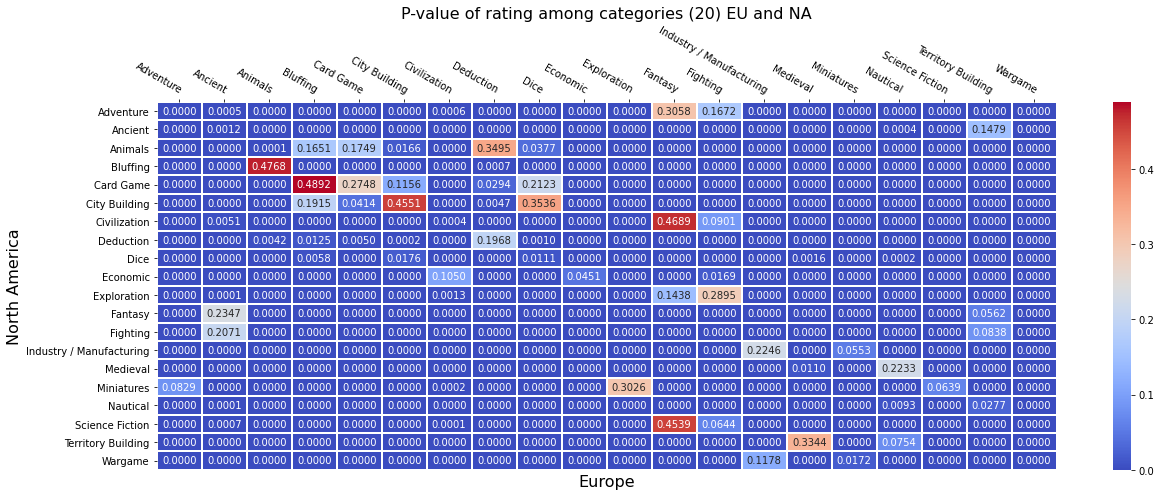

In [38]:
plt.figure(figsize = (18,7))
ax = sns.heatmap(p_value, annot=True,  linewidths=1.9, cmap='coolwarm', fmt='.4f')
ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)
plt.setp(ax.get_xticklabels(), rotation=-30, ha="right", rotation_mode="anchor")
ax.set_title("P-value of rating among categories (20) EU and NA",fontsize=16)
plt.xlabel("Europe", fontsize=16)
plt.ylabel("North America", fontsize=16)
plt.tight_layout()
plt.show()

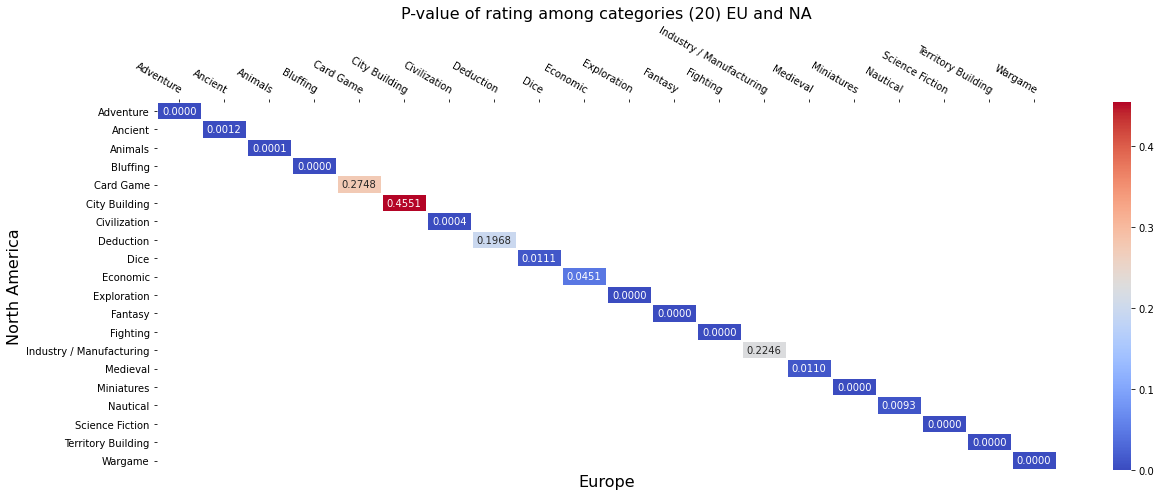

In [39]:
plt.figure(figsize = (18,7))
ax = sns.heatmap(p_value, annot=True, mask = mask, linewidths=1.9, cmap='coolwarm', fmt='.4f')
ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)
plt.setp(ax.get_xticklabels(), rotation=-30, ha="right", rotation_mode="anchor")
ax.set_title("P-value of rating among categories (20) EU and NA",fontsize=16)
plt.xlabel("Europe", fontsize=16)
plt.ylabel("North America", fontsize=16)
plt.tight_layout()
plt.show()

In [40]:
similar_categories[similar_categories['P_value'] < 0.0025]

,NorthAmerica_Categ,Europe_Categ,Mean_diff,P_value,Effect_size
21,Fantasy,Fantasy,-0.046197,2.778775e-08,-0.031765
63,Fighting,Fighting,-0.064429,5.077303e-11,-0.043586
84,Science Fiction,Science Fiction,-0.083035,1.618648e-14,-0.058231
105,Exploration,Exploration,-0.089056,2.567792e-14,-0.061120
126,Adventure,Adventure,-0.074749,1.694631e-10,-0.049474
147,Wargame,Wargame,-0.109555,6.246664e-20,-0.074045
210,Miniatures,Miniatures,-0.087353,1.445688e-12,-0.057574
273,Territory Building,Territory Building,-0.082785,3.097632e-10,-0.060630
294,Ancient,Ancient,-0.039220,1.244227e-03,-0.028813
315,Bluffing,Bluffing,-0.069811,8.781404e-06,-0.047397


In [41]:
similar_categories['Sigmificant'] = similar_categories['P_value'] < 0.0025

<ipython-input-41-a4cb393efd03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  similar_categories['Sigmificant'] = similar_categories['P_value'] < 0.0025


In [42]:
# list of categories with statisticall significat diference 
list(similar_categories[similar_categories['Sigmificant'] == True]['NorthAmerica_Categ'])

['Fantasy',
 'Fighting',
 'Science Fiction',
 'Exploration',
 'Adventure',
 'Wargame',
 'Miniatures',
 'Territory Building',
 'Ancient',
 'Bluffing',
 'Animals',
 'Civilization']

In [43]:
list(similar_categories[similar_categories['Sigmificant'] == False]['NorthAmerica_Categ'])

['Card Game',
 'Economic',
 'Medieval',
 'City Building',
 'Dice',
 'Deduction',
 'Nautical',
 'Industry / Manufacturing']

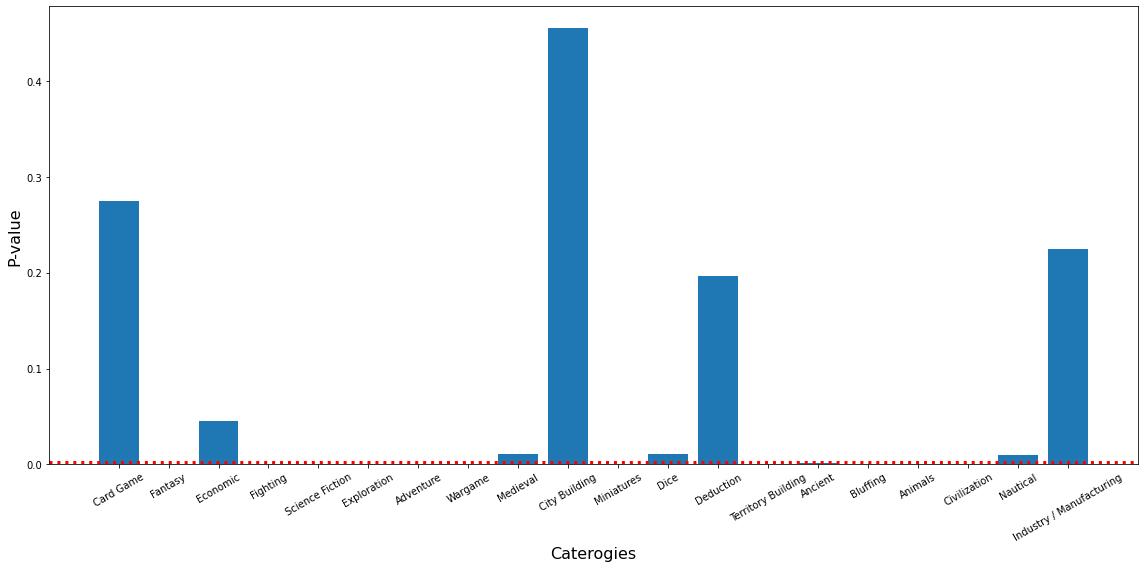

In [44]:
plt.figure(figsize = (16,8))
threshold = 0.0025
plt.bar(similar_categories['NorthAmerica_Categ'],similar_categories['P_value'])
plt.axhline(threshold, color='red', lw = 3, ls='dotted')
labels = similar_categories['NorthAmerica_Categ']
plt.xticks(labels, rotation=30)
ax.set_title("P-value between similar categories of EU and NA")
plt.xlabel("Caterogies", fontsize=16)
plt.ylabel("P-value", fontsize=16)
plt.tight_layout()
plt.show()

P - value inferring:  among top 20 categories from 1 000 top games we discovered that there statistically significant difference for 11 categories: 
1. 'Fantasy',
2. 'Fighting',
3. 'Science Fiction',
4. 'Exploration',
5. 'Adventure',
6. 'Wargame',
7. 'Miniatures',
8. 'Territory Building',
9. 'Ancient',
10. 'Bluffing',
11. 'Animals',
12. 'Civilization'

On the other hand, rest 9 categories has no statistically significant diference:
1. 'Card Game',
2. 'Economic',
3. 'Medieval',
4. 'City Building',
5. 'Dice',
6. 'Deduction',
7. 'Nautical',
8. 'Industry / Manufacturing'

### Simple mean difference as effect size

In [45]:
Mean_diff = categories_stats.pivot("NorthAmerica_Categ", "Europe_Categ", "Mean_diff")

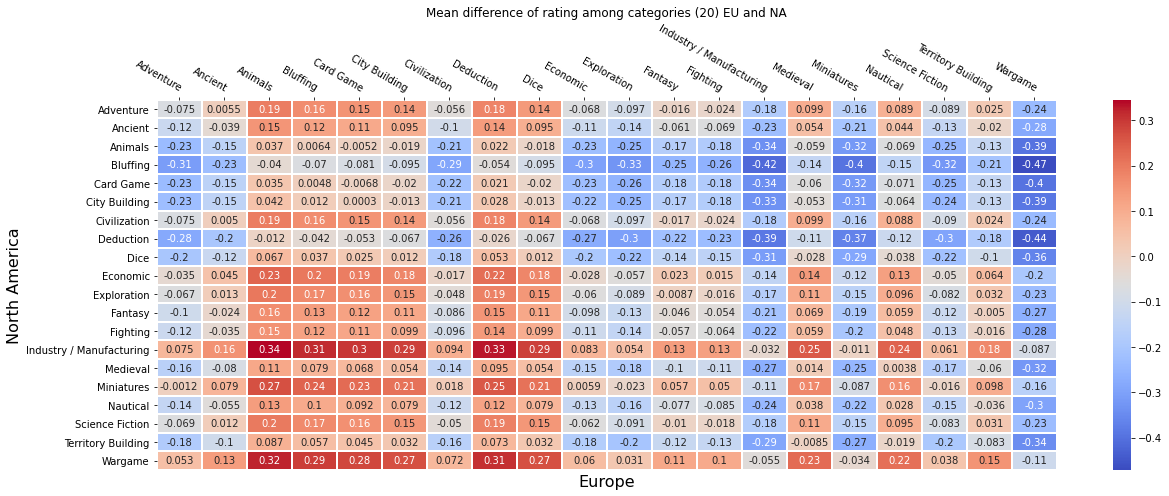

In [46]:
plt.figure(figsize = (18,7))
ax = sns.heatmap(Mean_diff, annot=True, linewidths=1.9, cmap='coolwarm')
ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)
plt.setp(ax.get_xticklabels(), rotation=-30, ha="right", rotation_mode="anchor")
ax.set_title("Mean difference of rating among categories (20) EU and NA")
plt.xlabel("Europe", fontsize=16)
plt.ylabel("North America", fontsize=16)
plt.tight_layout()
plt.show()

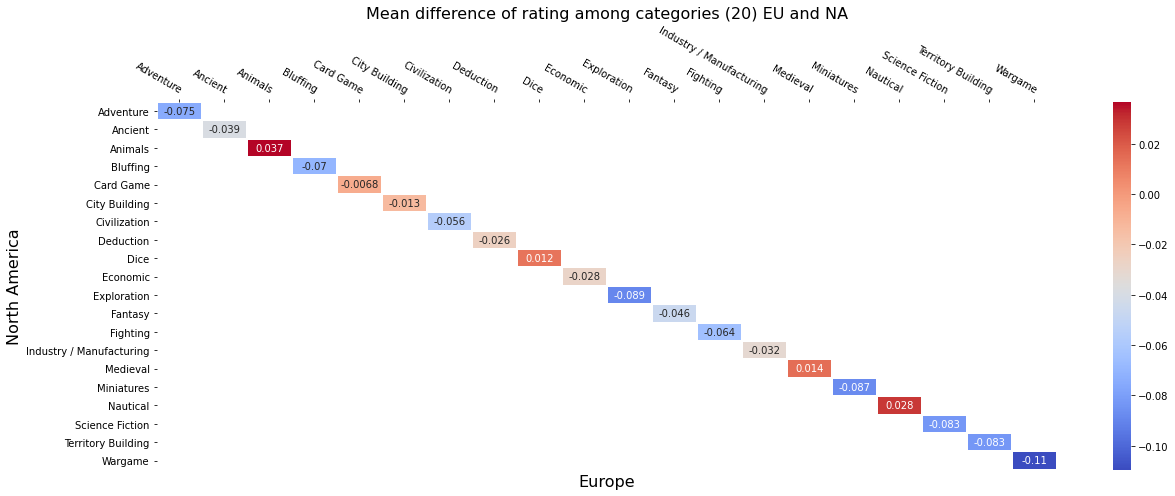

In [47]:
plt.figure(figsize = (18,7))
ax = sns.heatmap(Mean_diff, annot=True, mask=mask,linewidths=1.9, cmap='coolwarm')
ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)
plt.setp(ax.get_xticklabels(), rotation=-30, ha="right", rotation_mode="anchor")
ax.set_title("Mean difference of rating among categories (20) EU and NA", fontsize=16)
plt.xlabel("Europe", fontsize=16)
plt.ylabel("North America", fontsize=16)
plt.tight_layout()
plt.show()

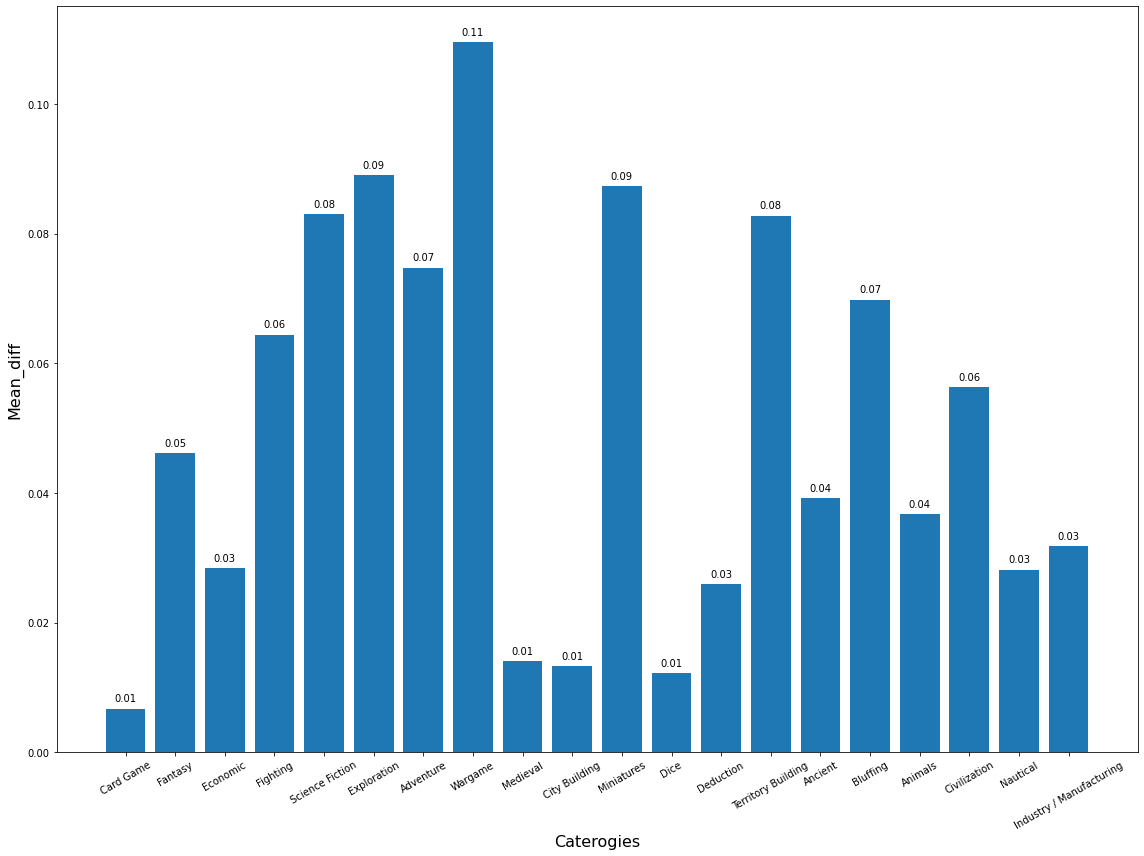

In [48]:
figure, axes = plt.subplots(figsize = (16,12))

plt.bar(similar_categories['NorthAmerica_Categ'],abs(similar_categories['Mean_diff']))
labels = similar_categories['NorthAmerica_Categ']
plt.xticks(labels, rotation=30)

#ax.title("Mean_diff between similar categories of EU and NA")
plt.xlabel("Caterogies", fontsize=16)
plt.ylabel("Mean_diff", fontsize=16)
# Iterrating over the bars one-by-one
for p in axes.patches:
    #print(p.get_x())
    #print(p.get_width())
    axes.annotate(text=np.round(p.get_height(), decimals=2),
                xy=(p.get_x()+p.get_width()/2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 10),
                textcoords='offset points')

#plt.legend(loc='best')
plt.tight_layout()
plt.show()


### Cohen’s  effect size 

In [49]:
effect_size = categories_stats.pivot("NorthAmerica_Categ", "Europe_Categ", "Effect_size")

In [50]:
effect_size.head(5)

Europe_Categ,Adventure,Ancient,Animals,Bluffing,Card Game,City Building,Civilization,Deduction,Dice,Economic,Exploration,Fantasy,Fighting,Industry / Manufacturing,Medieval,Miniatures,Nautical,Science Fiction,Territory Building,Wargame
NorthAmerica_Categ,,,,,,,,,,,,,,,,,,,,
Adventure,-0.049474,0.003752,0.133673,0.109390,0.107761,0.097522,-0.037385,0.122821,0.096775,-0.047840,-0.065170,-0.011065,-0.016023,-0.123014,0.068818,-0.105973,0.060295,-0.060608,0.016981,-0.159076
Ancient,-0.082892,-0.028813,0.112233,0.085236,0.079488,0.071512,-0.072138,0.099559,0.071117,-0.083261,-0.100344,-0.043012,-0.048049,-0.166444,0.040553,-0.142631,0.032618,-0.096137,-0.014607,-0.199791
Animals,-0.163351,-0.113861,0.027962,0.004645,-0.003818,-0.014411,-0.155894,0.016604,-0.014035,-0.168560,-0.182795,-0.123812,-0.128616,-0.254308,-0.044380,-0.224117,-0.052023,-0.179543,-0.099697,-0.283643
Bluffing,-0.207257,-0.160343,-0.028079,-0.047397,-0.058510,-0.068860,-0.198540,-0.037845,-0.067831,-0.218222,-0.227177,-0.172749,-0.176068,-0.289538,-0.096519,-0.263741,-0.101663,-0.224379,-0.147009,-0.322208
Card Game,-0.164914,-0.111020,0.025439,0.003432,-0.004895,-0.014865,-0.153805,0.014873,-0.014551,-0.165361,-0.182167,-0.124536,-0.129550,-0.245805,-0.043812,-0.225716,-0.050982,-0.177782,-0.097137,-0.281849


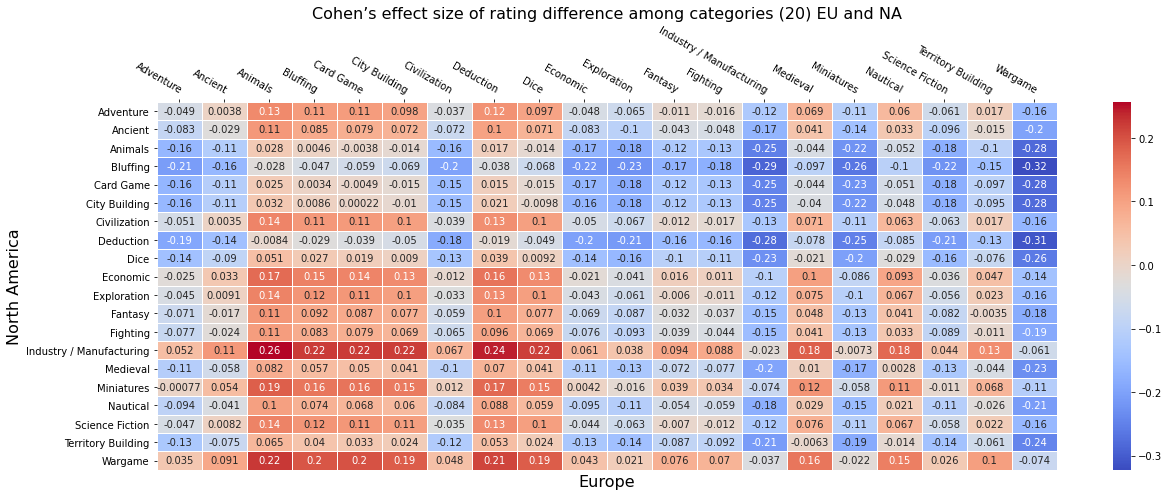

In [51]:
plt.figure(figsize = (18,7))
ax = sns.heatmap(effect_size, annot=True, linewidths=.5, cmap='coolwarm')
ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)
plt.setp(ax.get_xticklabels(), rotation=-30, ha="right", rotation_mode="anchor")
ax.set_title("Cohen’s effect size of rating difference among categories (20) EU and NA",fontsize=16)
plt.xlabel("Europe", fontsize=16)
plt.ylabel("North America", fontsize=16)
plt.tight_layout()
plt.show()

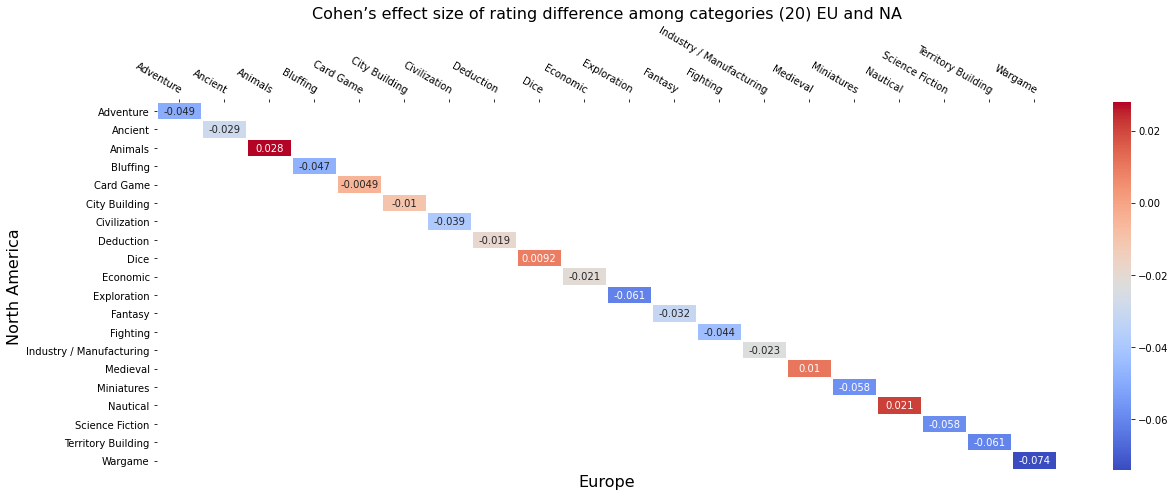

In [52]:
plt.figure(figsize = (18,7))
ax = sns.heatmap(effect_size, annot=True, mask = mask, linewidths=1.9, cmap='coolwarm')
ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)
plt.setp(ax.get_xticklabels(), rotation=-30, ha="right", rotation_mode="anchor")
ax.set_title("Cohen’s effect size of rating difference among categories (20) EU and NA",fontsize=16)
plt.xlabel("Europe", fontsize=16)
plt.ylabel("North America", fontsize=16)
plt.tight_layout()
plt.show()

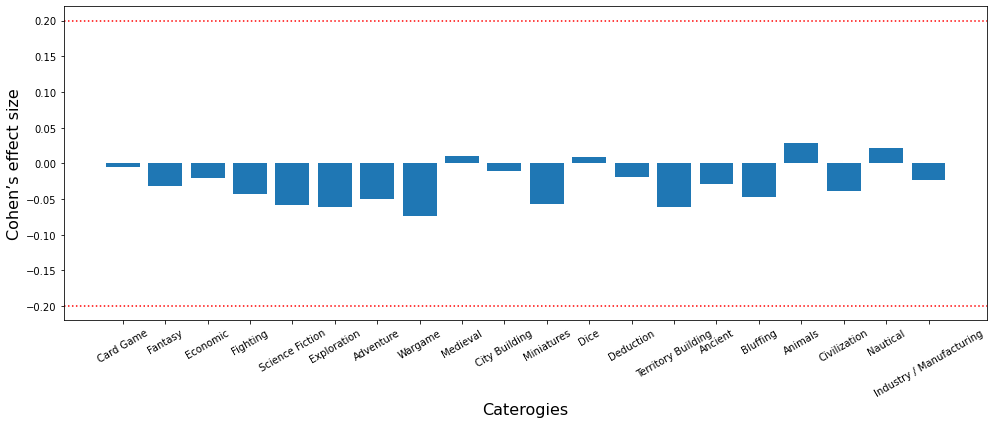

In [53]:
plt.figure(figsize = (14,6))
plt.axhline(0.2, color='red', ls='dotted')
plt.axhline(-0.2, color='red', ls='dotted')
plt.bar(similar_categories['NorthAmerica_Categ'],similar_categories['Effect_size'])
labels = similar_categories['NorthAmerica_Categ']
plt.xticks(labels, rotation=30)
ax.set_title("Cohen’s effect size between similar categories of EU and NA")
plt.xlabel("Caterogies", fontsize=16)
plt.ylabel("Cohen’s effect size", fontsize=16)
plt.tight_layout()
plt.show()

In [54]:
data_plotting= similar_categories[similar_categories['Sigmificant'] == True][['NorthAmerica_Categ','Effect_size']]

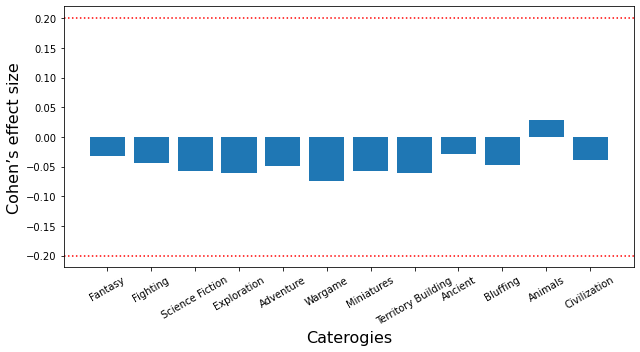

In [55]:
plt.figure(figsize = (9,5))
plt.axhline(0.2, color='red', ls='dotted')
plt.axhline(-0.2, color='red', ls='dotted')
plt.bar(data_plotting['NorthAmerica_Categ'],data_plotting['Effect_size'])
labels = data_plotting['NorthAmerica_Categ']
plt.xticks(labels, rotation=30)
ax.set_title("Cohen’s effect size between similar categories of EU and NA")
plt.xlabel("Caterogies", fontsize=16)
plt.ylabel("Cohen’s effect size", fontsize=16)
plt.tight_layout()
plt.show()

### Cohen’s d effect size magnitude

|Effect size | Cohen’s d      | 
|------------|----------------|
|Small    	 | 0.2	          | 
|Medium      | 0.5	          |
|Large   	 | 0.8 or greater |	

In [56]:
categories_stats

,NorthAmerica_Categ,Europe_Categ,Mean_diff,P_value,Effect_size
0,Card Game,Card Game,-0.006752,2.747708e-01,-0.004895
1,Card Game,Fantasy,-0.175877,5.315419e-166,-0.124536
2,Card Game,Economic,-0.227271,1.263552e-275,-0.165361
3,Card Game,Fighting,-0.183430,3.481909e-159,-0.129550
4,Card Game,Science Fiction,-0.248785,1.331370e-222,-0.177782
...,...,...,...,...,...
395,Industry / Manufacturing,Bluffing,0.314671,7.927131e-127,0.221539
396,Industry / Manufacturing,Animals,0.344951,2.265694e-193,0.256838
397,Industry / Manufacturing,Civilization,0.094391,7.855106e-16,0.067021
398,Industry / Manufacturing,Nautical,0.239136,5.769460e-83,0.175321
